# QCoDeS Example with Agilent 34400A

This notebook shows how to work with Agilent 34400A instrument qcodes driver and conduct measurements. Agilent 34400A qcodes driver works well for Agilent/HP 34401A instrument and these of two instruments have been used with Keithley 2600 equipment for testing purposes of this notebook. Image below shows the setup.

![title](../files/agilent34400Asetup.png)

Two Agilent 34400A instruments can be connected to a Keithley 2600 equipment simultaneously using a custom made connector. This connector connects to the Keithley 2600 equipment through two channels on the back panel as shown below.

![title1](../files/keithley2600connector.png)

In this notebook, we show how to conduct measurements with help of one Agilent/HP 34401A instrument connected with a Keithley 2600 equipment and then with two Agilent/HP 34401A instrument connected to two different channels of Keithley through a custom made connector. In the second scenario, measurment happens simultaneously.

Lets begin...

## Imports

In [2]:
%matplotlib nbagg

import numpy as np

from qcodes.dataset import Measurement, load_or_create_experiment, plot_dataset
from qcodes.instrument_drivers.agilent import Agilent34401A
from qcodes.instrument_drivers.Keithley import Keithley2614B

## Initialize instruments

In [2]:
k1 = Keithley2614B("Keithley1", address="GPIB0::26::INSTR")
a1 = Agilent34401A("Agilent2", "GPIB0::5::INSTR")
a2 = Agilent34401A("Agilent1", "GPIB0::4::INSTR")


# set integration time (number of line cycles)
a1.NPLC.set(10)
a2.NPLC.set(10)

Connected to: Keithley Instruments Inc. 2614B (serial:4305420, firmware:3.2.2) in 0.32s
Connected to: HEWLETT-PACKARD 34401A (serial:0, firmware:11-5-2) in 0.12s
Connected to: HEWLETT-PACKARD 34401A (serial:0, firmware:10-5-2) in 0.08s


## Station creation with initialized instruments

Above initialized instruments can be registered as components to your station by following instructions as mentioned in [15 min of QCoDeS Notebook](../basic_examples/15_minutes_to_QCoDeS.ipynb)

## Load an experiment or create a new one

In [4]:
tutorial_exp = load_or_create_experiment("tutorial_experiment", sample_name="no_sample")

## Measurements

Here, we use our Keithley k1 as the voltage source, and our Agilent a1 for measuring the voltage generated by k1. So, here we expect our generated data to be the same as measured ones, which we will plot shortly. 

In [5]:
meas1 = Measurement(exp=tutorial_exp)
meas1.register_parameter(k1.smua.volt)
meas1.register_parameter(a1.volt, setpoints=[k1.smua.volt])

with meas1.run() as datasaver:
    for set_v in np.linspace(-5, 5, 21):
        k1.smua.volt.set(set_v)
        datasaver.add_result((k1.smua.volt, k1.smua.volt()), (a1.volt, a1.volt()))
dataset = datasaver.dataset

Starting experimental run with id: 26. 


<IPython.core.display.Javascript object>


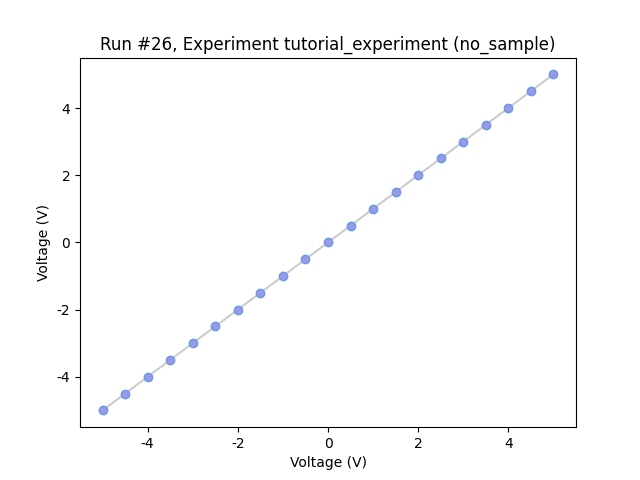

In [8]:
axes, cbax = plot_dataset(dataset)

for i in range(1):
    axes[i].lines[0].set_marker("o")
    axes[i].lines[0].set_markerfacecolor((0.6, 0.6, 0.9))
    axes[i].lines[0].set_markeredgecolor((0.4, 0.6, 0.9))
    axes[i].lines[0].set_color((0.8, 0.8, 0.8))

We repeat above using two Agilent DMMs to measure voltage generated from both Keithley channels simultaneously: 

In [9]:
meas2 = Measurement(exp=tutorial_exp)
meas2.register_parameter(k1.smua.volt)
meas2.register_parameter(k1.smub.volt)
meas2.register_parameter(a1.volt, setpoints=[k1.smua.volt])
meas2.register_parameter(a2.volt, setpoints=[k1.smub.volt])

In [10]:
with meas2.run() as datasaver:
    for set_v in np.linspace(-5, 5, 21):
        k1.smua.volt(set_v)
        k1.smub.volt(set_v)
        datasaver.add_result(
            (k1.smua.volt, k1.smua.volt()),
            (k1.smub.volt, k1.smub.volt()),
            (a1.volt, a1.volt()),
            (a2.volt, a2.volt()),
        )
dataset2 = datasaver.dataset

Starting experimental run with id: 27. 


<IPython.core.display.Javascript object>


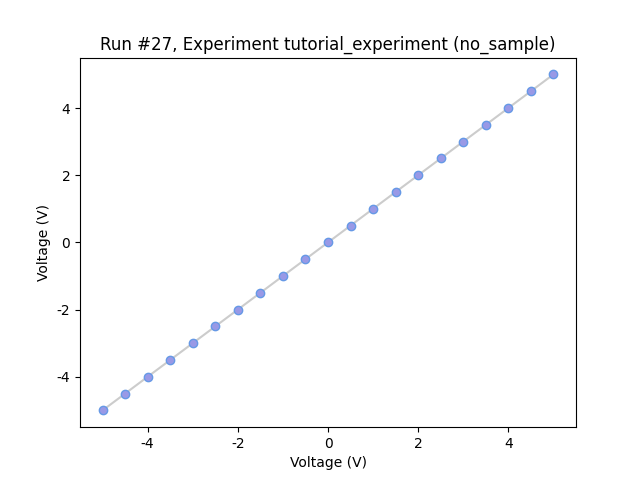

<IPython.core.display.Javascript object>


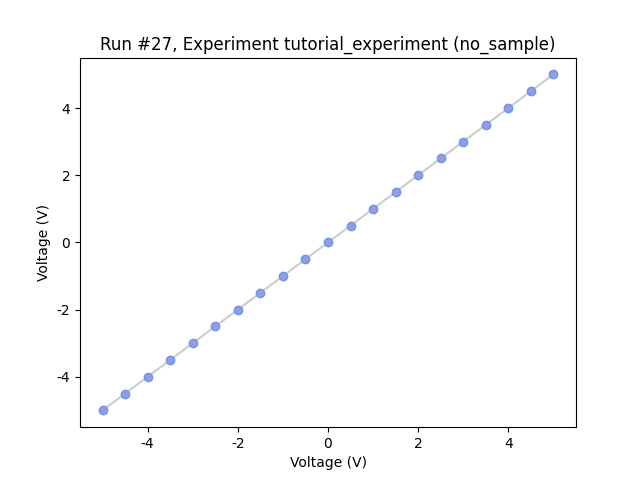

In [11]:
axes, cbax = plot_dataset(dataset2)

for i in range(2):
    axes[i].lines[0].set_marker("o")
    axes[i].lines[0].set_markerfacecolor((0.6, 0.6, 0.9))
    axes[i].lines[0].set_markeredgecolor((0.4, 0.6, 0.9))
    axes[i].lines[0].set_color((0.8, 0.8, 0.8))